### EDA

#### Libraries

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pypair.association import binary_binary, continuous_continuous, binary_continuous

#### Preparing Data

##### Reading and filtering

In [38]:
bd_all = pd.read_spss('17_abril.sav')

# Filter the dataset to work only with alcohol patients
bd = bd_all[bd_all['Alcohol_DxCIE'] == 'Sí']

# Filter the dataset to work only with 'Situacion_tratamiento' == 'Abandono' or 'Alta'
bd = bd[(bd['Situacion_tratamiento'] == 'Abandono') | (bd['Situacion_tratamiento'] == 'Alta terapéutica')]

##### Defining sets of patients

In [39]:
# Pre-pandemic
conj_pre = bd[bd['Pandemia_inicio_fin_tratamiento'] == 'Inicio y fin prepandemia']
# Pre-pandemic abandono
pre_abandono = conj_pre[conj_pre['Situacion_tratamiento'] == 'Abandono']
# Pre-pandemic alta
pre_alta = conj_pre[conj_pre['Situacion_tratamiento'] == 'Alta terapéutica']

# Post-pandemic
# Merging last two classes to balance sets
conj_post = bd[(bd['Pandemia_inicio_fin_tratamiento'] == 'Inicio prepandemia y fin en pandemia') | 
               (bd['Pandemia_inicio_fin_tratamiento'] == 'inicio y fin en pandemia')]
# Post-pandemic abandono
post_abandono = conj_post[conj_post['Situacion_tratamiento'] == 'Abandono']
# Post-pandemic alta
post_alta = conj_post[conj_post['Situacion_tratamiento'] == 'Alta terapéutica']

# Concatenate the two data frames and add a new column to distinguish between them. Useful for plots
conj_post['Group'] = 'Post'
conj_pre['Group'] = 'Pre'
combined_pre_post = pd.concat([conj_post, conj_pre])

C:\Users\Joaquín Torres\AppData\Local\Temp\ipykernel_4740\2495984927.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conj_post['Group'] = 'Post'
C:\Users\Joaquín Torres\AppData\Local\Temp\ipykernel_4740\2495984927.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conj_pre['Group'] = 'Pre'


#### First Steps

##### Inspecting the dataframes

In [18]:
print("PRE")
print(conj_pre.info())
print ("-------------------------------")
print("PRE-ABANDONO")
print(pre_abandono.info())
print ("-------------------------------")
print("PRE-ALTA")
print(pre_alta.info())
print ("-------------------------------")

print("\n\n\n")

print ("POST")
print(conj_post.info())
print ("-------------------------------")
print("POST-ABANDONO")
print(post_abandono.info())
print ("-------------------------------")
print("POST-ALTA")
print(post_alta.info())
print ("-------------------------------")

PRE
<class 'pandas.core.frame.DataFrame'>
Index: 22861 entries, 0 to 85164
Data columns (total 73 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   CODPROYECTO                                22861 non-null  float64 
 1   Education                                  22861 non-null  object  
 2   Social_protection                          22861 non-null  object  
 3   Job_insecurity                             22861 non-null  object  
 4   Housing                                    22861 non-null  object  
 5   Alterations_early_childhood_develop        22861 non-null  object  
 6   Social_inclusion                           22861 non-null  object  
 7   Risk_stigma                                21606 non-null  category
 8   Structural_conflic                         22861 non-null  float64 
 9   Age                                        22852 non-null  float64 
 10  Sex        

##### Replacing unknown values with the mode

In [40]:
# 9.0 represents unknown according to Variables.docx 
print(bd['Social_inclusion'].unique())
mode_soc_inc = bd['Social_inclusion'].mode()[0]
# print(mode_soc_inc)
bd['Social_inclusion'] = bd['Social_inclusion'].replace('9.0', mode_soc_inc)
print(bd['Social_inclusion'].unique())

['Live with families or friends' 'live alone' 'live in institutions' '9.0']
['Live with families or friends' 'live alone' 'live in institutions']


In [41]:
print(bd['Alterations_early_childhood_develop'].unique())
mode_alt = bd['Alterations_early_childhood_develop'].mode()[0]
bd['Alterations_early_childhood_develop'] = bd['Alterations_early_childhood_develop'].replace('9', mode_alt)
print(bd['Alterations_early_childhood_develop'].unique())

['No alterations (first exposure at 11 or more years)'
 'Alterations (first exposure before 11 years old)' '9']
['No alterations (first exposure at 11 or more years)'
 'Alterations (first exposure before 11 years old)']


In [42]:
print(bd['Risk_stigma'].unique())
mode_stigma = bd['Risk_stigma'].mode()[0]
bd['Risk_stigma'] = bd['Risk_stigma'].replace(99.0, mode_stigma)
print(bd['Risk_stigma'].unique())

[NaN, 'Yes', 'No']
Categories (3, object): [99.0, 'No', 'Yes']
[NaN, 'Yes', 'No']
Categories (2, object): ['No', 'Yes']


C:\Users\Joaquín Torres\AppData\Local\Temp\ipykernel_4740\1073322024.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  bd['Risk_stigma'] = bd['Risk_stigma'].replace(99.0, mode_stigma)


In [43]:
print(bd['NumHijos'].unique())
mode_hijos = bd['NumHijos'].mode()[0]
bd['NumHijos'] = bd['NumHijos'].replace(99.0, mode_hijos)
print(bd['NumHijos'].unique())

[nan  0.  1.  2.  3.  4.  5.  8. 10.  6. 11. 12.  9.  7. 99. 14. 15.]
[nan  0.  1.  2.  3.  4.  5.  8. 10.  6. 11. 12.  9.  7. 14. 15.]


##### Quantifying Null Values

In [ ]:
print(f"Total missing values Age: {bd['Age'].isnull().sum()}")
print(f"Total missing values Años_consumo_droga: {bd['Años_consumo_droga'].isnull().sum()}")
print(f"Total missing values Risk_stigma: {bd['Risk_stigma'].isnull().sum()}")
print(f"Total missing values NumHijos: {bd['NumHijos'].isnull().sum()}")

print("\tCONJUNTO PREPANDEMIA")
print(f"\t\tMissing values Age: {conj_pre['Age'].isnull().sum()}")
print(f"\t\tMissing values Años_consumo_droga: {conj_pre['Años_consumo_droga'].isnull().sum()}")
print(f"\t\tMissing values Risk_stigma: {conj_pre['Risk_stigma'].isnull().sum()}")
print(f"\t\tMissing values NumHijos: {conj_pre['NumHijos'].isnull().sum()}")

print("\tCONJUNTO POSTPANDEMIA")
print(f"\t\tMissing values Age: {conj_post['Age'].isnull().sum()}")
print(f"\t\tMissing values Años_consumo_droga: {conj_post['Años_consumo_droga'].isnull().sum()}")
print(f"\t\tMissing values Risk_stigma: {conj_post['Risk_stigma'].isnull().sum()}")
print(f"\t\tMissing values NumHijos: {conj_post['NumHijos'].isnull().sum()}")

##### Replacing missing values with mode

In [44]:
age_mode = bd['Age'].mode()[0]
bd['Age'].fillna(age_mode, inplace=True)

años_consumo_mode = bd['Años_consumo_droga'].mode()[0]
bd['Años_consumo_droga'].fillna(años_consumo_mode, inplace=True)

risk_stigma_mode = bd['Risk_stigma'].mode()[0]
bd['Risk_stigma'].fillna(risk_stigma_mode, inplace=True)

num_hijos_mode = bd['NumHijos'].mode()[0]
bd['NumHijos'].fillna(num_hijos_mode, inplace=True)

C:\Users\Joaquín Torres\AppData\Local\Temp\ipykernel_4740\3303146707.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bd['Age'].fillna(age_mode, inplace=True)
C:\Users\Joaquín Torres\AppData\Local\Temp\ipykernel_4740\3303146707.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


#### Distribution of variables

##### Classifying variables into numerical and discrete/categorical 

In [ ]:
disc_atts = ['Education', 'Social_protection', 'Job_insecurity', 'Housing',
        'Alterations_early_childhood_develop', 'Social_inclusion',
        'Risk_stigma', 'Sex', 'NumHijos', 'Smoking', 'Biological_vulnerability',
        'Opiaceos_DxCIE', 'Cannabis_DXCIE', 'BZD_DxCIE', 'Cocaina_DxCIE',
        'Alucinogenos_DXCIE', 'Tabaco_DXCIE', 'FrecuenciaConsumo30Dias',
        'OtrosDx_Psiquiatrico', 'Tx_previos', 'Readmisiones_estudios', 'Nreadmision'
        ]

num_atts = ['Structural_conflic', 'Adherencia_tto_recalc', 'Age', 'Años_consumo_droga', 'Tiempo_tx']

##### Distribution of discrete attributes

###### Count plots

In [ ]:
fig, axs = plt.subplots(len(disc_atts), 1, figsize=(15, 5*len(disc_atts)))
plt.subplots_adjust(hspace=0.75, wspace=1.25)

for i, disc_att in enumerate(disc_atts):
    ax = sns.countplot(x=disc_att, data=combined_pre_post, hue=combined_pre_post[['Situacion_tratamiento', 'Group']].apply(tuple, axis=1),
                       hue_order=[('Abandono', 'Pre'),('Alta terapéutica', 'Pre'), ('Abandono', 'Post'), ('Alta terapéutica', 'Post')],
                       ax=axs[i])
    ax.set_title(disc_att, fontsize=16, fontweight='bold')
    ax.get_legend().set_title("Groups")
    
    # Adding count annotations
    for p in ax.patches:
        if p.get_label() == '_nolegend_':
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 9), 
                        textcoords = 'offset points')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save the figure in SVG format with DPI=600 in the "./EDA_plots" folder
plt.savefig('./EDA_plots/countplots.svg', dpi=600, bbox_inches='tight')

###### Normalized count plots

In [ ]:
# Function to plot countplot 
def plot_count_perc_norm(i: int, group:int, disc_att:str) -> None:
    """
        group: 1 (all), 2 (pre), 3 (post) 
    """

    # Define data to work with based on group
    if group == 1:
        df = bd 
    elif group == 2:
        df = conj_pre
    elif group == 3:
        df = conj_post

    # GOAL: find percentage of each possible category within the total of its situacion_tto subset
    # Group data by 'Situacion_tratamiento' and 'Education' and count occurrences
    grouped_counts = df.groupby(['Situacion_tratamiento', disc_att]).size().reset_index(name='count')
    # Calculate total count for each 'Situacion_tratamiento' group
    total_counts = df.groupby('Situacion_tratamiento')[disc_att].count()
    # Divide each count by its corresponding total count and calculate percentage
    grouped_counts['percentage'] = grouped_counts.apply(lambda row: row['count'] / total_counts[row['Situacion_tratamiento']] * 100, axis=1)
    
    # Follow the same order in plot as in computations
    col_order = grouped_counts[grouped_counts['Situacion_tratamiento'] == 'Abandono'][disc_att].tolist()

    # Create countplot and split each bar into two based on the value of sit_tto
    ax = sns.countplot(x=disc_att, hue='Situacion_tratamiento', data=df, order=col_order, ax=axs[i, group-2])

    # Adjust y-axis to represent percentages out of the total count
    ax.set_ylim(0, 100)

    percentages = grouped_counts['percentage']
    for i, p in enumerate(ax.patches):
        # Skip going over the legend values
        if p.get_label() == "_nolegend_":
            # Set height to corresponding percentage and annotate result
            height = percentages[i]
            p.set_height(height)
            ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=6, color='black', xytext=(0, 5),
                        textcoords='offset points')

In [ ]:
fig, axs = plt.subplots(len(disc_atts), 2, figsize=(15, 7*len(disc_atts)))
plt.subplots_adjust(hspace=0.75, wspace=1.5)

for i, disc_att in enumerate(disc_atts):

    # # 1: ALL    
    # plot_count_perc_norm(i, 1, disc_att)
    # axs[i, 0].set_title("\nALL")
    # axs[i, 0].set_xlabel(disc_att, fontweight='bold')
    # axs[i, 0].set_ylabel("% of total within its Sit_tto group")
    # axs[i, 0].tick_params(axis='x', rotation=90)
    
    # 2: PRE
    plot_count_perc_norm(i, 2, disc_att)
    axs[i, 0].set_title("\nPRE")
    axs[i, 0].set_xlabel(disc_att, fontweight='bold')
    axs[i, 0].set_ylabel("% of total within its Sit_tto group")
    axs[i, 0].tick_params(axis='x', rotation=90)

    # 3: POST
    plot_count_perc_norm(i, 3, disc_att)
    axs[i, 1].set_title("\nPOST")
    axs[i, 1].set_xlabel(disc_att, fontweight='bold')
    axs[i, 1].set_ylabel("% of total within its Sit_tto group")
    axs[i, 1].tick_params(axis='x', rotation=90)

    
# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save the figure in SVG format with DPI=600 in the "./EDA_plots" folder
plt.savefig('./EDA_plots/norm_countplots.svg', dpi=600, bbox_inches='tight')

##### Distribution of numeric attributes

###### Summary statistics

In [ ]:
print(bd[num_atts].describe())

###### Boxplots

In [ ]:
fig, axs = plt.subplots(len(num_atts), 1, figsize=(12, 5*len(num_atts)))
plt.subplots_adjust(hspace=0.75, wspace=1.5)

for i, num_att in enumerate(num_atts):
    plt.subplot(len(num_atts), 1, i+1)
    sns.boxplot(
        data=combined_pre_post,
        x = num_att,
        y = 'Group',
        hue='Situacion_tratamiento',
    )

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save the figure in SVG format with DPI=600 in the "./EDA_plots" folder
plt.savefig('./EDA_plots/boxplots.svg', dpi=600, bbox_inches='tight')

###### Histograms

In [ ]:
fig, axs = plt.subplots(len(num_atts), 3, figsize=(15, 6*len(num_atts)))
plt.subplots_adjust(hspace=0.75, wspace=1.5)

for i, num_att in enumerate(num_atts):

    # 1: All alcohol patients
    sns.histplot(data=bd,x=num_att,bins=15, hue='Situacion_tratamiento', stat='probability', common_norm=False, kde=True,
                 line_kws={'lw': 5}, alpha = 0.4, ax=axs[i, 0])
    axs[i, 0].set_title(f"\nDistr. of {num_att}  - ALL")

    # 2: PRE
    sns.histplot(data=conj_pre,x=num_att,bins=15, hue='Situacion_tratamiento', stat='probability', common_norm=False, kde=True, 
                 line_kws={'lw': 5}, alpha = 0.4, ax=axs[i, 1])
    axs[i, 1].set_title(f"\nDistr. of {num_att}  - PRE")

    # Subplot 3: POST
    sns.histplot(data=conj_post,x=num_att,bins=15, hue='Situacion_tratamiento', stat='probability', common_norm=False, kde=True, 
                 line_kws={'lw': 5}, alpha = 0.4, ax=axs[i, 2])
    axs[i, 2].set_title(f"\nDistr. of {num_att}  - POST")

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save the figure in SVG format with DPI=600 in the "./EDA_plots" folder
plt.savefig('./EDA_plots/histograms.svg', dpi=600, bbox_inches='tight')

#### Correlation Analysis

##### Turning binary variables into 0/1 values

In [45]:
# --------------------------------------------------------------------------

# 'Alterations_early_childhood_develop'
alterations_mapping = {
    'No alterations (first exposure at 11 or more years)' : 0,
    'Alterations (first exposure before 11 years old)': 1,
}

bd['Alterations_early_childhood_develop_REDEF'] = bd['Alterations_early_childhood_develop'].map(alterations_mapping)

# --------------------------------------------------------------------------

# Social protection
bd['Social_protection_REDEF'] = bd['Social_protection'].map({'No':0, 'Sí':1})

# --------------------------------------------------------------------------

# 'Risk_stigma'
bd['Risk_stigma_REDEF'] = bd['Risk_stigma'].map({'No':0, 'Yes':1})

# --------------------------------------------------------------------------

# 'Sex'
bd['Sex_REDEF'] = bd['Sex'].map({'Hombre':0, 'Mujer':1})

# --------------------------------------------------------------------------

# 'Smoking'
bd['Smoking_REDEF'] = bd['Smoking'].map({'No':0, 'Sí':1})

# --------------------------------------------------------------------------

# 'Biological_vulnerability'
bd['Biological_vulnerability_REDEF'] = bd['Biological_vulnerability'].map({'No':0, 'Sí':1})

# --------------------------------------------------------------------------

# 'Droga_DxCIE'
bd['Opiaceos_DxCIE_REDEF'] = bd['Opiaceos_DxCIE'].map({'No': 0, 'Sí': 1})
bd['Cannabis_DXCIE_REDEF'] = bd['Cannabis_DXCIE'].map({'No': 0, 'Sí': 1})
bd['BZD_DxCIE_REDEF'] = bd['BZD_DxCIE'].map({'No': 0, 'Sí': 1})
bd['Cocaina_DxCIE_REDEF'] = bd['Cocaina_DxCIE'].map({'No': 0, 'Sí': 1})
bd['Alucinogenos_DXCIE_REDEF'] = bd['Alucinogenos_DXCIE'].map({'No': 0, 'Sí': 1})
bd['Tabaco_DXCIE_REDEF'] = bd['Tabaco_DXCIE'].map({'No': 0, 'Sí': 1})

# --------------------------------------------------------------------------

# 'OtrosDx_Psiquiatrico'
bd['OtrosDx_Psiquiatrico_REDEF'] = bd['OtrosDx_Psiquiatrico'].map({'No':0, 'Sí':1})

# --------------------------------------------------------------------------

# 'Tx_previos'
bd['Tx_previos_REDEF'] = bd['Tx_previos'].map({'No':0, 'Sí':1})

# --------------------------------------------------------------------------

# 'Situacion_tratamiento'
bd['Situacion_tratamiento_REDEF'] = bd['Situacion_tratamiento'].map({'Abandono':0, 'Alta terapéutica':1})

# --------------------------------------------------------------------------

##### Defining groups of variables

In [46]:
social_vars = ['Education', 'Social_protection', 'Job_insecurity', 'Housing', 'Alterations_early_childhood_develop', 
            'Social_inclusion', 'Risk_stigma', 'Structural_conflic']
ind_vars = ['Age', 'Sex', 'NumHijos', 'Smoking', 'Biological_vulnerability', 'Opiaceos_DxCIE', 
            'Cannabis_DXCIE', 'BZD_DxCIE', 'Cocaina_DxCIE', 'Alucinogenos_DXCIE', 'Tabaco_DXCIE', 
            'FrecuenciaConsumo30Dias', 'Años_consumo_droga','OtrosDx_Psiquiatrico', 'Tx_previos', 'Adherencia_tto_recalc'] 
target_var = 'Situacion_tratamiento'

# Incluir alcohol?

In [47]:
# Columns that are already numeric and we don't need to redefine 
no_redef_cols = ['Structural_conflic', 'Age', 'NumHijos', 'Años_consumo_droga', 'Adherencia_tto_recalc']

In [ ]:
# res_vars = ['Tiempo_tx', 'Readmisiones_estudios', 'Periodos_COVID', 'Pandemia_inicio_fin_tratamiento', 
#            'Nreadmision', 'Readmisiones_PRECOVID', 'Readmisiones_COVID']

##### One-hot encode categorical variables

In [48]:
# Specify columns to one hot encode; empty list otherwise
one_hot_vars = ['Education', 'Job_insecurity', 'Housing', 'Social_inclusion', 'FrecuenciaConsumo30Dias']

one_hots_vars_prefix = {
    'Education': 'Ed',
    'Job_insecurity': 'JobIn',
    'Housing': 'Hous', 
    'Social_inclusion': 'SocInc',
    'FrecuenciaConsumo30Dias': 'Frec30',
}

one_hot_cols_dic = {}

for one_hot_var in one_hot_vars:
    # Create one hot encoding version of attribute and concatenate new columns to main df
    encoded_var = pd.get_dummies(bd[one_hot_var], prefix=one_hots_vars_prefix[one_hot_var])
    bd = pd.concat([bd, encoded_var], axis=1)
    one_hot_cols_dic[one_hot_var] = encoded_var.columns.tolist()

# print(one_hot_cols_dic['FrecuenciaConsumo30Dias'])

###### Defining final version of columns of interest

In [49]:
soc_vars_enc = []
for soc_var in social_vars:
    # If no need to redefine, append directly
    if soc_var in no_redef_cols:
        soc_vars_enc.append(soc_var)
    # If need to redefine
    else:
        # Check if it was one-hot encoded
        if soc_var in one_hot_vars:
            # Append all one hot columns
            soc_vars_enc = soc_vars_enc + one_hot_cols_dic[soc_var]
        # If not, use redefined version through mapping
        else:
            soc_vars_enc.append(soc_var + '_REDEF')

ind_vars_enc = []
for ind_var in ind_vars:
    # If no need to redefine, append directly
    if ind_var in no_redef_cols:
        ind_vars_enc.append(ind_var)
    # If need to redefine
    else:
        # Check if it was one-hot encoded
        if ind_var in one_hot_vars:
            # Append all one hot columns
            ind_vars_enc = ind_vars_enc + one_hot_cols_dic[ind_var]
        # If not, use redefined version through mapping
        else:
            ind_vars_enc.append(ind_var + '_REDEF')

# Final version of columns we need to use for correlation analysis
corr_cols = soc_vars_enc + ind_vars_enc

###### Update main data frames

In [50]:
# Pre-pandemic
conj_pre = bd[bd['Pandemia_inicio_fin_tratamiento'] == 'Inicio y fin prepandemia']
# Pre-pandemic abandono
pre_abandono = conj_pre[conj_pre['Situacion_tratamiento'] == 'Abandono']
# Pre-pandemic alta
pre_alta = conj_pre[conj_pre['Situacion_tratamiento'] == 'Alta terapéutica']

# Post-pandemic
# Merging last two classes to balance sets
conj_post = bd[(bd['Pandemia_inicio_fin_tratamiento'] == 'Inicio prepandemia y fin en pandemia') | 
               (bd['Pandemia_inicio_fin_tratamiento'] == 'inicio y fin en pandemia')]
# Post-pandemic abandono
post_abandono = conj_post[conj_post['Situacion_tratamiento'] == 'Abandono']
# Post-pandemic alta
post_alta = conj_post[conj_post['Situacion_tratamiento'] == 'Alta terapéutica']

##### Building correlation matrix

In [51]:
binary_vars = [col for col in corr_cols if len(bd[col].unique()) == 2] + ['Situacion_tratamiento_REDEF', 'Risk_stigma_REDEF']
cont_vars = ['Structural_conflic', 'Age', 'NumHijos', 'Años_consumo_droga', 'Adherencia_tto_recalc']

In [52]:
def get_corr_matrix(df, cols):
    
    # Initialize nxn matrix to zeroes
    n = len(cols)
    corr_matrix = np.zeros((n,n))

    for i, var_i in enumerate(cols):
        for j, var_j in enumerate(cols):
            # Fill lower triangle of matrix
            if i > j:
                # Binary with binary correlation: tetrachoric
                if var_i in binary_vars and var_j in binary_vars:
                    corr = binary_binary(df[var_i], df[var_j], measure='tetrachoric')
                # Continuous with continuous correlation: 
                elif var_i in cont_vars and var_j in cont_vars:
                    # Returning nan sometimes:
                    # corr_tuple = continuous_continuous(df[var_i], df[var_j], measure = 'spearman')
                    # corr = corr_tuple[0]
                    corr = df[var_i].corr(df[var_j], method='spearman')
                # Binary vs Continuous correlation:
                else:
                    if var_i in binary_vars:
                        bin_var = var_i
                        cont_var = var_j
                    else:
                        bin_var = var_j
                        cont_var = var_i
                    corr = binary_continuous(df[bin_var], df[cont_var], measure='biserial')
                # Assign value to matrix
                corr_matrix[i][j] = corr 
                      
    return corr_matrix

In [53]:
def plot_heatmap(sit_tto: int, group:int) -> None:
    """
        sit_tto: 1 (include it as another var), 2 (only abandono), 3 (only alta)
        group: 1 (all alcohol patients), 2 (pre), 3 (post)
    """

    # Define columns based on sit_tto arg
    if sit_tto == 1:
        # Include target as another variable
        cols = [target_var + '_REDEF'] + corr_cols
    else:
        cols = corr_cols
        
    # Title plot and select datat based on group and sit_tto
    if group == 1:
        plot_title = "Correl Matrix - ALL"
        if sit_tto == 1:
            bd_ca = bd[cols]
        elif sit_tto == 2:
            bd_ca = bd[bd['Situacion_tratamiento'] == 'Abandono'][cols]
        elif sit_tto == 3:
            bd_ca = bd[bd['Situacion_tratamiento'] == 'Alta terapéutica'][cols]
    elif group == 2:
        plot_title = "Correl Matrix - PRE"
        if sit_tto == 1:    
            bd_ca = conj_pre[cols]
        elif sit_tto == 2:
            bd_ca = pre_abandono[cols]
        elif sit_tto == 3:
            bd_ca = pre_alta[cols]
    elif group == 3:
        plot_title = "Correl Matrix - POST"
        if sit_tto == 1:    
            bd_ca = conj_post[cols]
        elif sit_tto == 2:
            bd_ca = post_abandono[cols]
        elif sit_tto == 3:
            bd_ca = post_alta[cols]
            
    # Complete title
    if sit_tto == 2:
        plot_title += " - ABANDONO"
    elif sit_tto == 3:
        plot_title += " - ALTA"

    corr_matrix = get_corr_matrix(bd_ca, cols)

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Create heatmap correlation matrix
    dataplot = sns.heatmap(corr_matrix, mask=mask, xticklabels=cols, yticklabels=cols, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f", annot_kws={"size": 4})

    # Group ind vs social vars by color and modify tick label names
    for tick_label in dataplot.axes.xaxis.get_ticklabels():
        if tick_label.get_text() in ind_vars_enc:
            tick_label.set_color('green')
        elif tick_label.get_text() in soc_vars_enc:
            tick_label.set_color('purple')  
    for tick_label in dataplot.axes.yaxis.get_ticklabels():
        if tick_label.get_text() in ind_vars_enc:
            tick_label.set_color('green')
        elif tick_label.get_text() in soc_vars_enc:
            tick_label.set_color('purple') 

    # Increase the size of xtick labels
    # dataplot.tick_params(axis='x', labelsize=12)

    # Increase the size of ytick labels
    # dataplot.tick_params(axis='y', labelsize=12)

    # Add legend and place it in lower left 
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Social Factors', markerfacecolor='purple', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Individual Factors', markerfacecolor='green', markersize=10)
    ], bbox_to_anchor=(-0.1, -0.1), fontsize = 20)

    plt.title("\n\n" + plot_title, fontdict={'fontsize': 30, 'fontweight': 'bold'})

    return corr_matrix

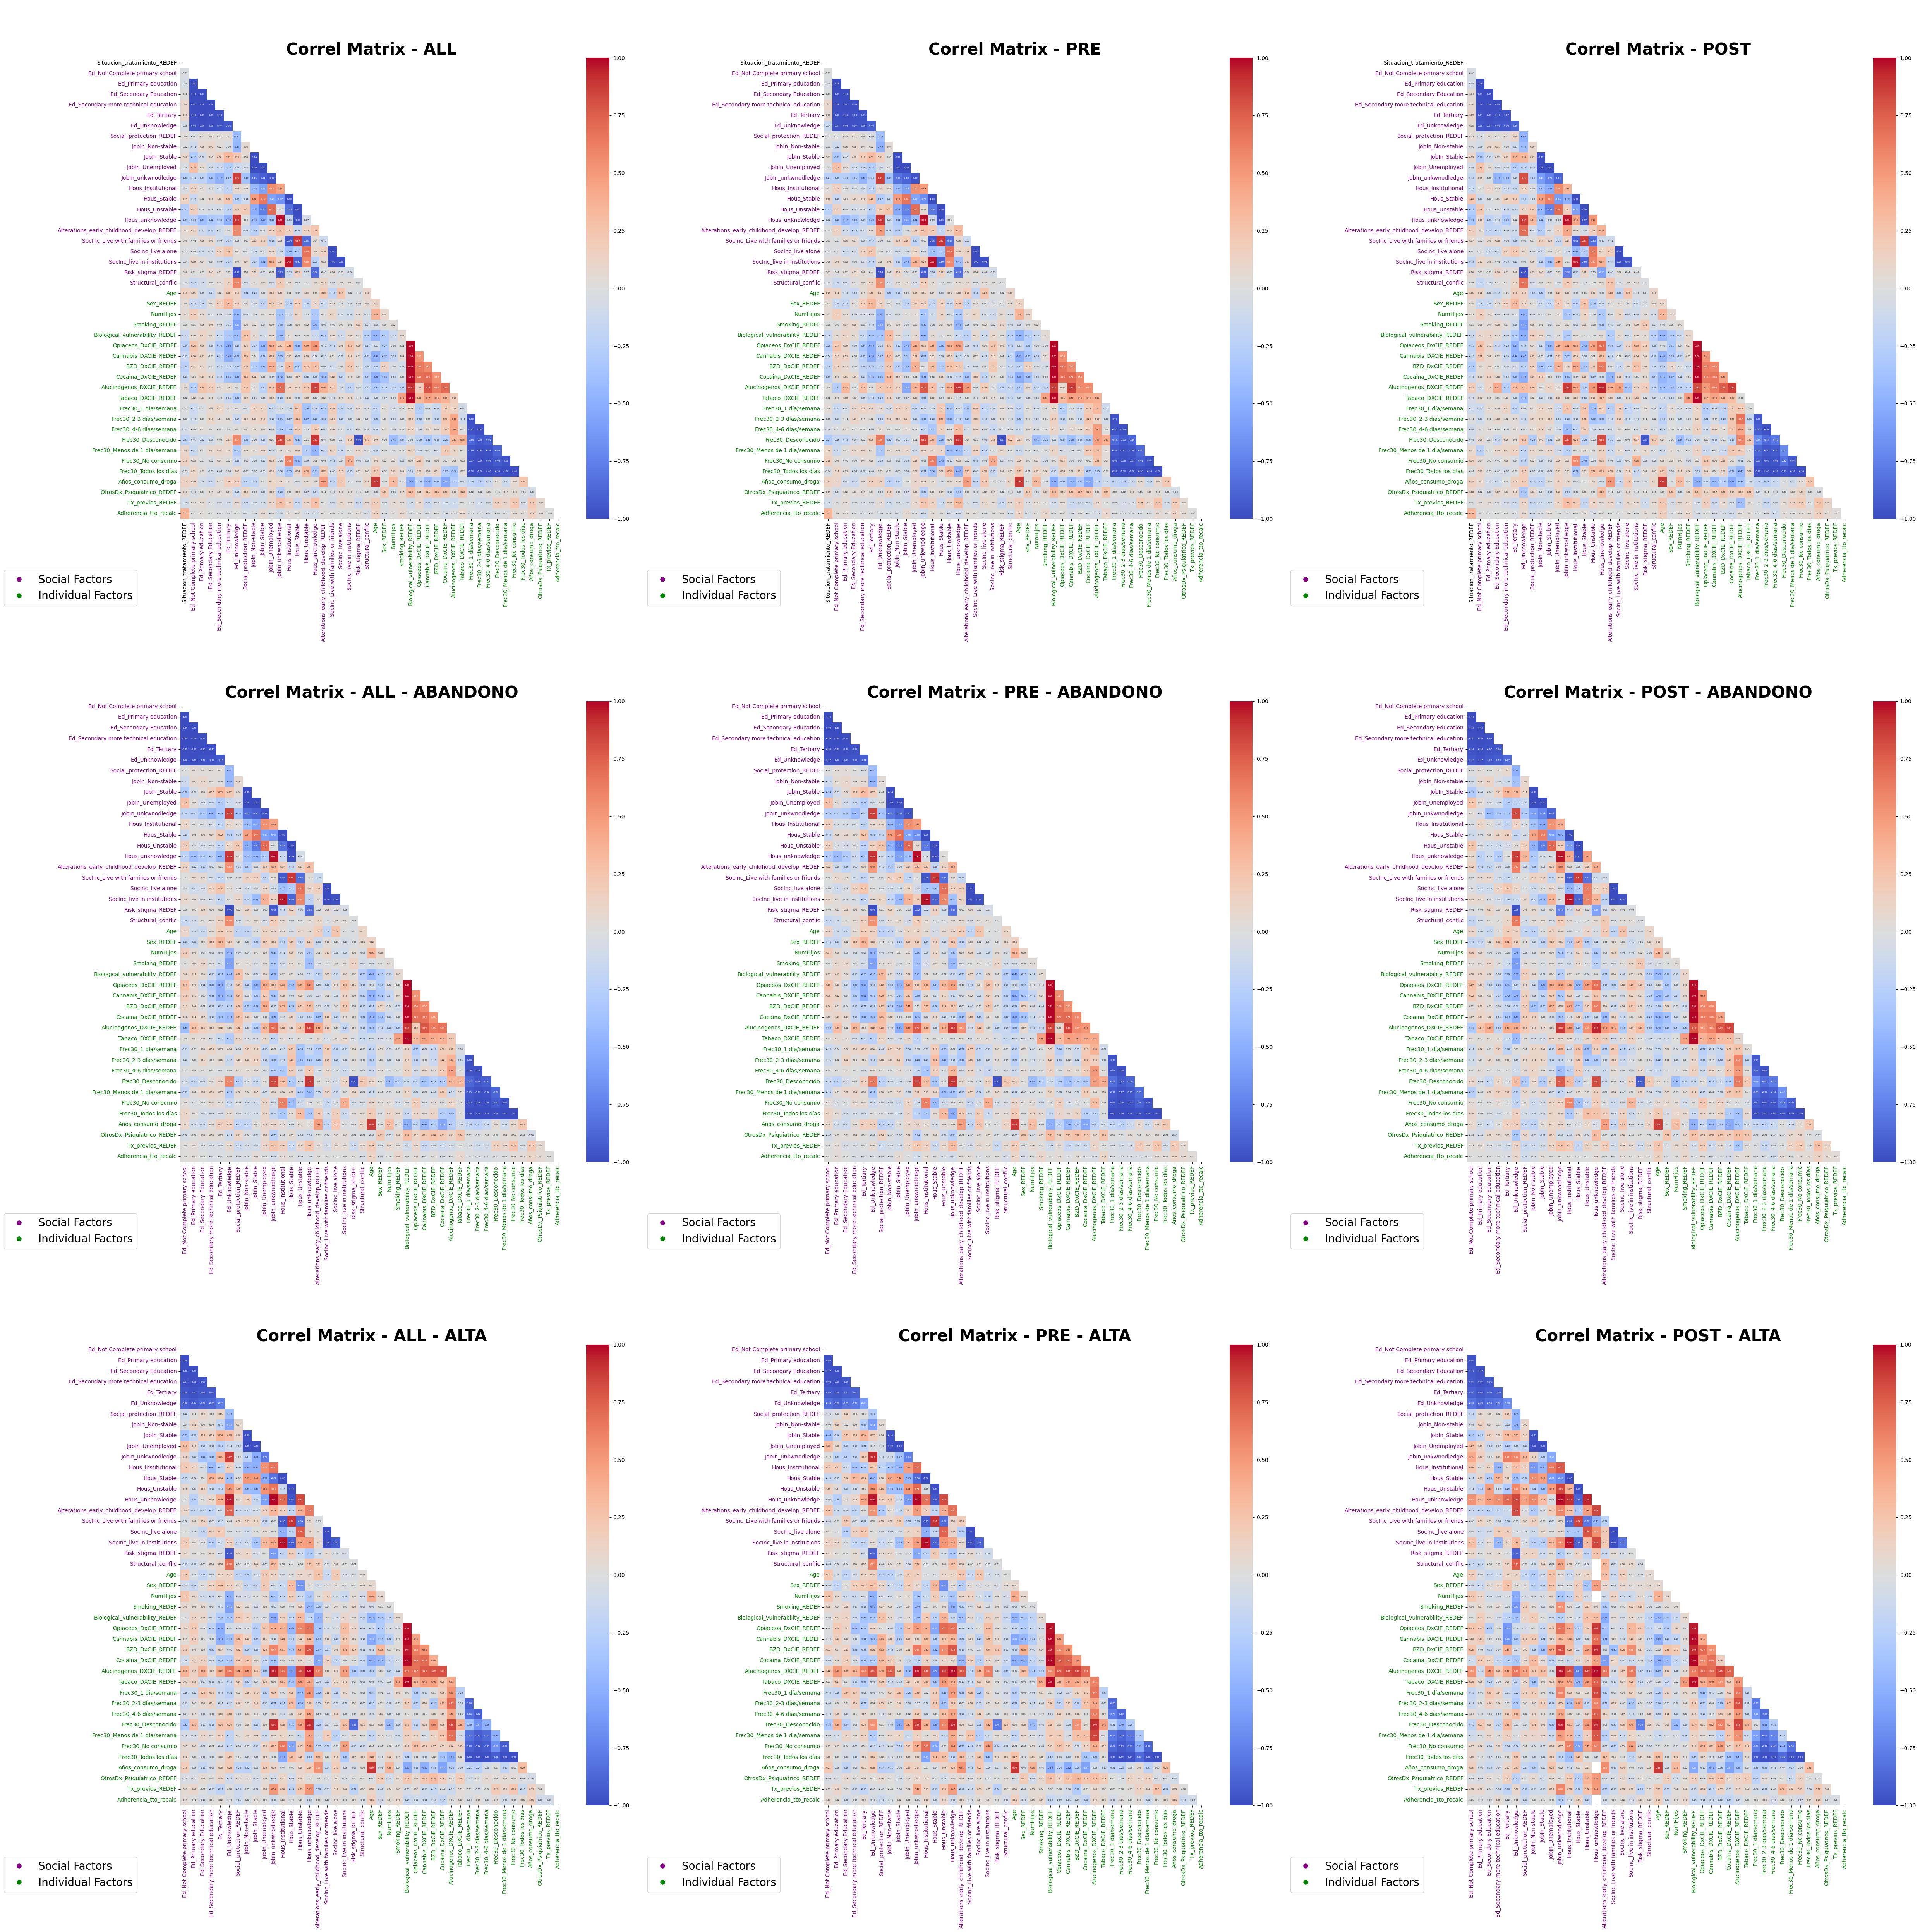

In [54]:
fig, axs = plt.subplots(3, 3, figsize=(50, 50))
plt.subplots_adjust(hspace=0.75, wspace=2)
corr_mats = [] # List of tuples (m1, m2) to store the 3 pairs of matrices to compare (pre vs post)

# Go through possible values for 'Situacion_tratamiento' and 'Group'
for sit_tto in range(1,4):
    # ALL
    plt.subplot(3, 3, 3*(sit_tto-1) + 1)  # Calculate the subplot position dynamically
    _ = plot_heatmap(sit_tto, 1)
    # PRE
    plt.subplot(3, 3, 3*(sit_tto-1) + 2) 
    corr_matrix_pre = plot_heatmap(sit_tto, 2)
    # POST
    plt.subplot(3, 3, 3*(sit_tto-1) + 3)
    corr_matrix_post = plot_heatmap(sit_tto, 3)

    corr_mats.append((corr_matrix_pre, corr_matrix_post))
        
# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save the figure in SVG format in the "./EDA_plots" folder
plt.savefig('./EDA_plots/heatmaps_one_hot.svg', dpi=550, bbox_inches='tight')

##### Finding significative differences between PRE and POST

In [55]:
def find_diff (sit_tto:int, m_pre, m_post):

    diff_list = []  # List to store tuples of (difference, variable_i, variable_j)

    if sit_tto == 1:
        cols = [target_var + '_REDEF'] + corr_cols
    else:
        cols = corr_cols
    # Go through matrices
    for i, var_i in enumerate(cols):
        for j, var_j in enumerate(cols):
            # If difference greater than certain threshold, print variables 
            val_pre = m_pre[i][j]
            val_post = m_post[i][j]
            diff = abs(val_pre - val_post)
            diff_list.append((diff, var_i, var_j, val_pre, val_post))
    
    # Sort the list based on the difference value in descending order
    diff_list.sort(key=lambda x: x[0], reverse=True)
            
    # Print the sorted list
    for diff, var_i, var_j, val_pre, val_post in diff_list:
        # Give ind vs soc vars their corresponding color
        if var_i in ind_vars_enc:
            print(colors.GREEN + var_i + colors.RESET, end=' ')
        else:
            print(colors.PURPLE + var_i + colors.PURPLE, end=' ')
        print("& ", end='')
        if var_j in ind_vars_enc:
            print(colors.GREEN + var_j + colors.RESET, end=' ')
        else:
            print(colors.PURPLE + var_j + colors.RESET, end=' ')
        print(f"--> Diff: {diff:.2f} (PRE: {val_pre:.2f}; POST: {val_post:.2f})")

In [56]:
class colors:
    RED = '\033[91m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    BLUE = '\033[94m'
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    WHITE = '\033[97m'
    RESET = '\033[0m'

# Print colored text
print(colors.RED + "This is red text." + colors.RESET)
print(colors.GREEN + "This is green text." + colors.RESET)
print(colors.BLUE + "This is blue text." + colors.RESET)

This is red text.
This is green text.
This is blue text.


In [57]:
print("------SIT_TTO 1: NO FILTERING------")
find_diff(1, corr_mats[0][0], corr_mats[0][1])

------SIT_TTO 1: NO FILTERING------
SocInc_live in institutions & Hous_unknowledge --> Diff: 0.77 (PRE: -0.40; POST: 0.37)
Frec30_Todos los días & Hous_unknowledge --> Diff: 0.74 (PRE: -0.48; POST: 0.26)
Alucinogenos_DXCIE_REDEF & JobIn_Stable --> Diff: 0.64 (PRE: -0.53; POST: 0.11)
OtrosDx_Psiquiatrico_REDEF & Hous_unknowledge --> Diff: 0.57 (PRE: -0.28; POST: 0.29)
Alucinogenos_DXCIE_REDEF & Ed_Secondary more technical education --> Diff: 0.55 (PRE: 0.28; POST: -0.27)
Frec30_2-3 días‎/semana & Alucinogenos_DXCIE_REDEF --> Diff: 0.54 (PRE: 0.13; POST: 0.67)
Alucinogenos_DXCIE_REDEF & SocInc_live alone --> Diff: 0.53 (PRE: 0.19; POST: -0.34)
Hous_unknowledge & JobIn_Stable --> Diff: 0.53 (PRE: -0.61; POST: -0.09)
Hous_unknowledge & Hous_Institutional --> Diff: 0.53 (PRE: -0.09; POST: 0.44)
Frec30_Menos de 1 día‎/semana & Hous_unknowledge --> Diff: 0.52 (PRE: -0.38; POST: 0.14)
Alucinogenos_DXCIE_REDEF & SocInc_Live with families or friends --> Diff: 0.50 (PRE: -0.03; POST: 0.47)
Hous_u

In [58]:
print("------SIT_TTO 2: ABANDONO-----")
find_diff(2, corr_mats[1][0], corr_mats[1][1])

------SIT_TTO 2: ABANDONO-----
Frec30_Todos los días & Hous_unknowledge --> Diff: 0.76 (PRE: -0.50; POST: 0.26)
SocInc_live in institutions & Hous_unknowledge --> Diff: 0.72 (PRE: -0.38; POST: 0.35)
Alucinogenos_DXCIE_REDEF & JobIn_Stable --> Diff: 0.58 (PRE: -0.51; POST: 0.07)
OtrosDx_Psiquiatrico_REDEF & Hous_unknowledge --> Diff: 0.55 (PRE: -0.25; POST: 0.31)
Hous_unknowledge & JobIn_Stable --> Diff: 0.52 (PRE: -0.59; POST: -0.07)
Alucinogenos_DXCIE_REDEF & Ed_Secondary more technical education --> Diff: 0.51 (PRE: 0.32; POST: -0.18)
Frec30_Menos de 1 día‎/semana & Hous_unknowledge --> Diff: 0.50 (PRE: -0.35; POST: 0.15)
Alucinogenos_DXCIE_REDEF & SocInc_live alone --> Diff: 0.50 (PRE: 0.22; POST: -0.28)
Alucinogenos_DXCIE_REDEF & Opiaceos_DxCIE_REDEF --> Diff: 0.49 (PRE: 0.07; POST: 0.55)
Alucinogenos_DXCIE_REDEF & SocInc_Live with families or friends --> Diff: 0.48 (PRE: -0.06; POST: 0.41)
Hous_unknowledge & Hous_Institutional --> Diff: 0.47 (PRE: -0.06; POST: 0.42)
Alucinogenos_D

In [59]:
print("------SIT_TTO 3: ALTA-----")
find_diff(3, corr_mats[2][0], corr_mats[2][1])

------SIT_TTO 3: ALTA-----
Hous_Unstable & Ed_Secondary Education --> Diff: 0.62 (PRE: -0.16; POST: 0.46)
Hous_unknowledge & Ed_Not Complete primary school --> Diff: 0.59 (PRE: -0.05; POST: 0.53)
Hous_unknowledge & Ed_Primary education --> Diff: 0.57 (PRE: -0.26; POST: 0.31)
Hous_unknowledge & JobIn_Unemployed --> Diff: 0.57 (PRE: -0.62; POST: -0.05)
Risk_stigma_REDEF & Hous_unknowledge --> Diff: 0.57 (PRE: -0.32; POST: 0.25)
SocInc_Live with families or friends & Hous_unknowledge --> Diff: 0.54 (PRE: 0.08; POST: -0.46)
SocInc_live alone & Alterations_early_childhood_develop_REDEF --> Diff: 0.47 (PRE: -0.25; POST: 0.22)
Hous_unknowledge & Ed_Secondary Education --> Diff: 0.46 (PRE: 0.03; POST: 0.49)
JobIn_unkwnodledge & Social_protection_REDEF --> Diff: 0.45 (PRE: -0.12; POST: 0.33)
Hous_unknowledge & Ed_Secondary more technical education --> Diff: 0.45 (PRE: 0.10; POST: 0.55)
SocInc_live alone & Hous_unknowledge --> Diff: 0.45 (PRE: 0.09; POST: 0.54)
JobIn_unkwnodledge & Ed_Tertiary -

#### PCA (in progress)

In [60]:
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [61]:
# Standarize data to have mean 0 and sd 1, since variables have different dispersions -> PCA
pca_pipe = make_pipeline(StandardScaler(), PCA())
cols = [target_var + '_REDEF'] + corr_cols
pca_pipe.fit(bd[cols])

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [62]:
# Generate index for the number of principal components
pca_index = [f"PC{i+1}" for i in range(len(modelo_pca.components_))]

# Convert the array to a DataFrame
df = pd.DataFrame(data=modelo_pca.components_, columns=cols, index=pca_index)

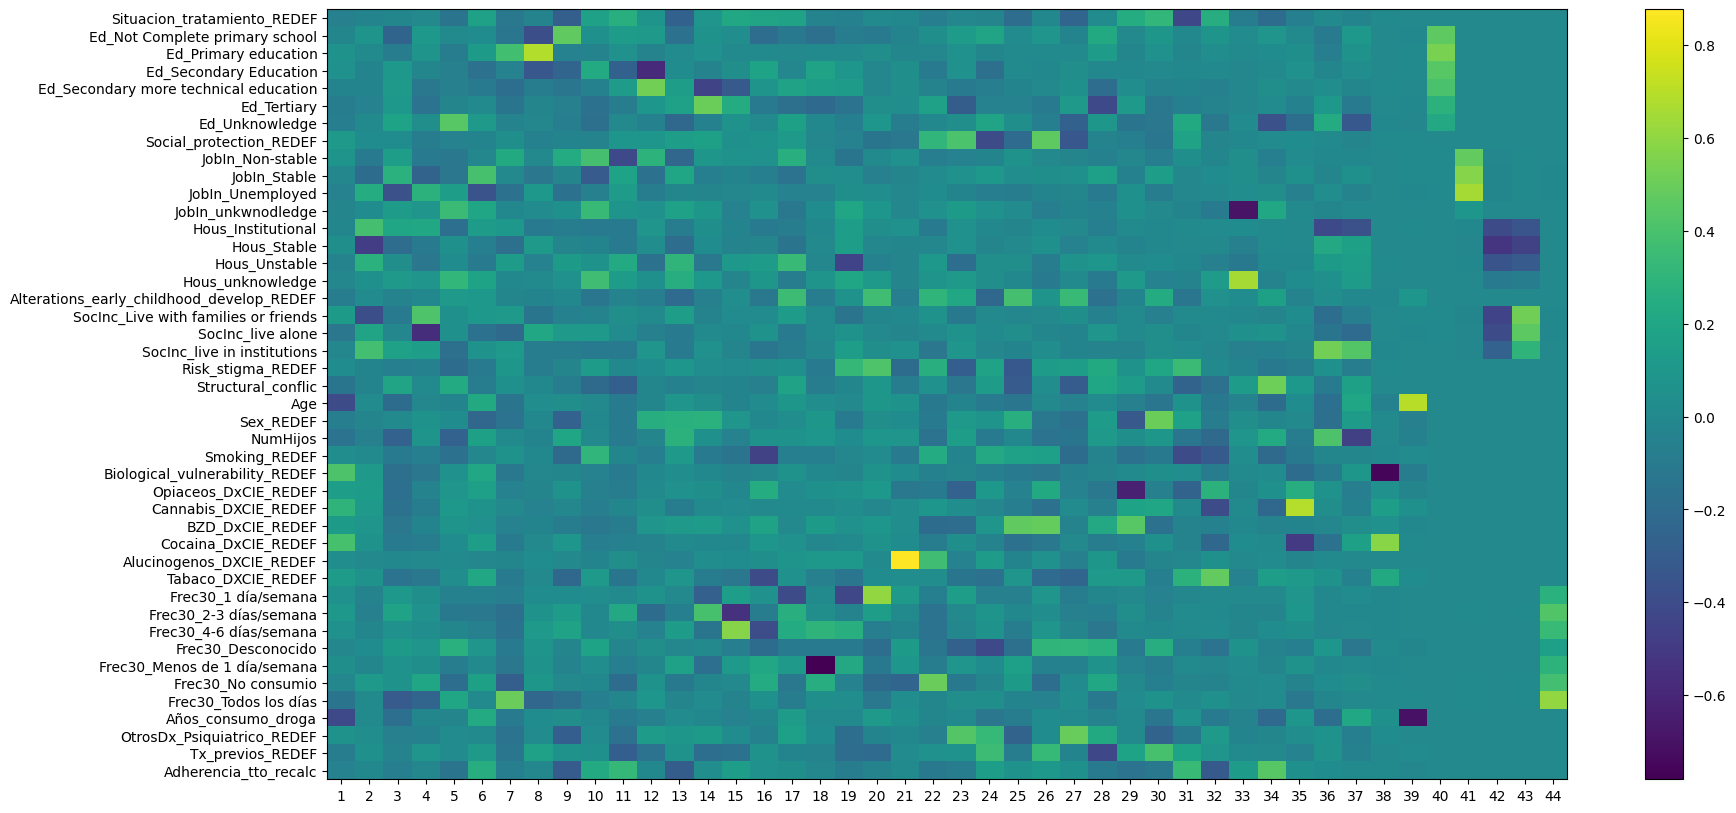

In [65]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(cols)), cols)
plt.xticks(range(len(cols)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar()

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[7.99390487e-02 6.63046834e-02 4.77297888e-02 3.92663759e-02
 3.80673844e-02 3.41579222e-02 3.39919012e-02 3.20527002e-02
 2.95945294e-02 2.88898244e-02 2.76491094e-02 2.72926270e-02
 2.66912490e-02 2.58263140e-02 2.53811284e-02 2.49602931e-02
 2.45862030e-02 2.43331190e-02 2.40742799e-02 2.36198875e-02
 2.27286765e-02 2.26385673e-02 2.22231285e-02 2.16091062e-02
 2.08771845e-02 2.06449696e-02 2.03635486e-02 2.00381097e-02
 1.86818960e-02 1.79031051e-02 1.76040359e-02 1.59694979e-02
 1.57421506e-02 1.47542862e-02 1.39310555e-02 1.23998576e-02
 1.21398790e-02 3.04019349e-03 2.30238308e-03 6.71408759e-29
 8.12184746e-30 3.13746465e-30 2.57376484e-30 1.87909870e-32]


Text(0, 0.5, 'Por. varianza explicada')

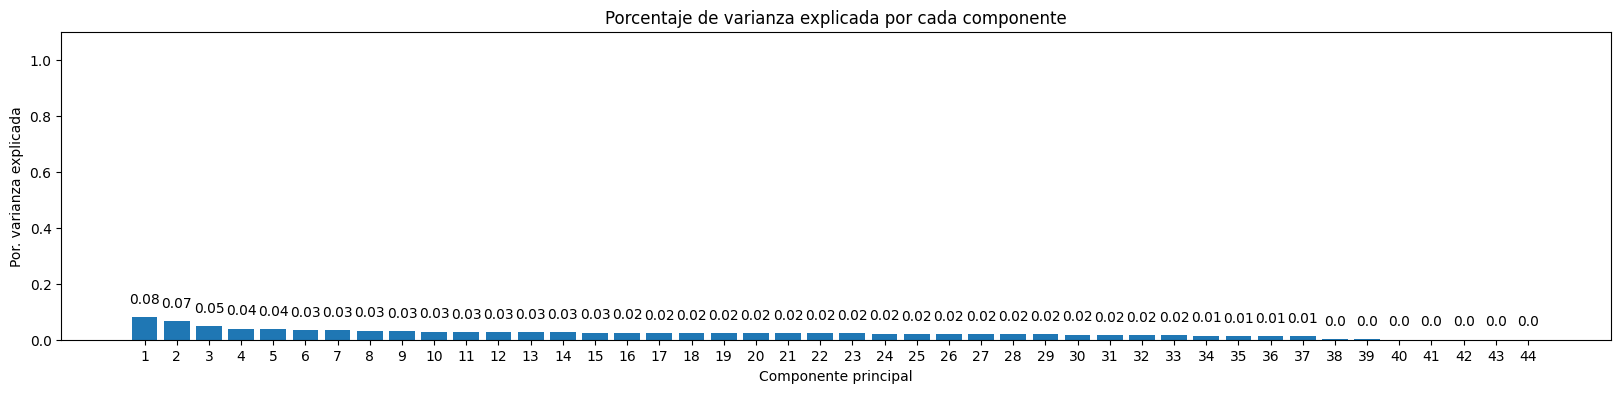

In [74]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(cols)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.07993905 0.14624373 0.19397352 0.2332399  0.27130728 0.3054652
 0.3394571  0.3715098  0.40110433 0.42999416 0.45764327 0.4849359
 0.51162714 0.53745346 0.56283459 0.58779488 0.61238108 0.6367142
 0.66078848 0.68440837 0.70713705 0.72977561 0.75199874 0.77360785
 0.79448503 0.81513    0.83549355 0.85553166 0.87421356 0.89211666
 0.9097207  0.92569019 0.94143235 0.95618663 0.97011769 0.98251754
 0.99465742 0.99769762 1.         1.         1.         1.
 1.         1.        ]


Text(0, 0.5, 'Por. varianza acumulada')

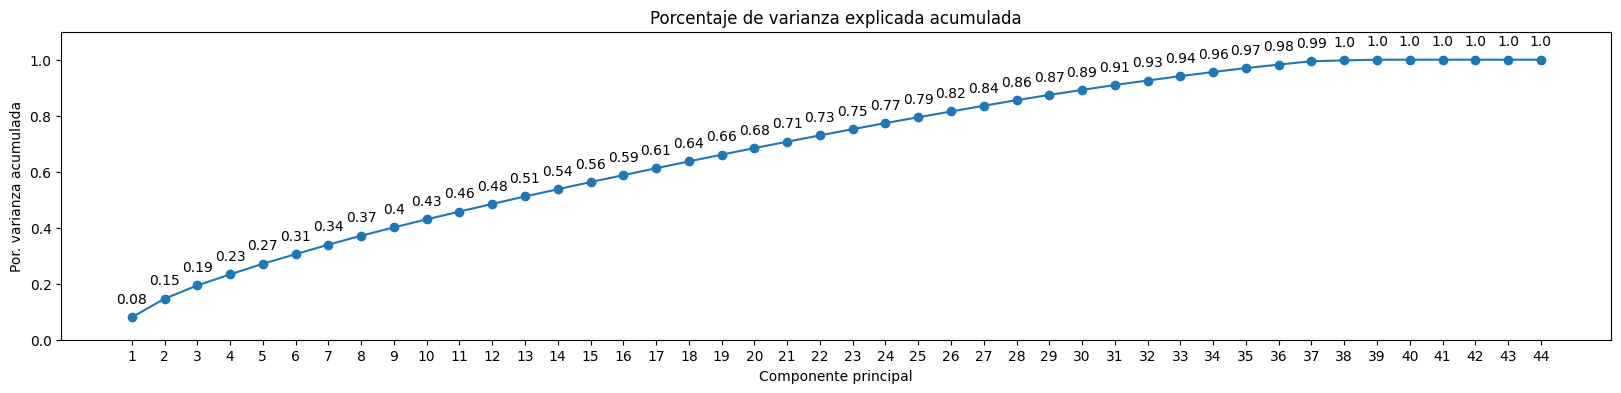

In [76]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
ax.plot(
    np.arange(len(cols)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(cols)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')